# CASA0002: Urban Simulation Assessment

## Author: Anbing Ma

## 0 The preparation

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import numpy as np
import random as rnd
import matplotlib.patches as mpatches
from IPython.display import clear_output
from igraph import *
import networkx as nx
import scipy.io
import math
import enum
import time
import nx_altair as nxa

Text(0.5, 1.0, 'The bow-tie network')

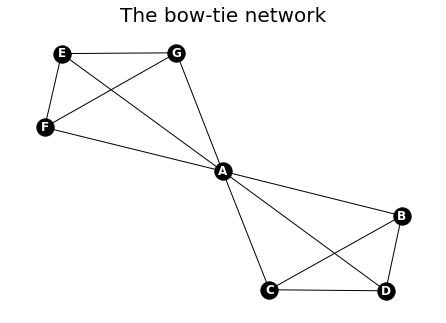

In [10]:
#make an empty graph
g1=nx.Graph()

#add edges linking nodes:
g1.add_edges_from([("A","B"),("A","C"),("A","D"),("A","E"),("A","F"),("A","G"),("B","C"),("B","D"),("C","D"),("E","F"),("E","G"),("F","G")])

#plot the graph
nx.draw(g1,
        with_labels = True,
        node_color='black',
        font_color="white",
        font_weight='bold')
plt.title("The bow-tie network",fontsize=20)

In [64]:
# import the data
G = nx.read_graphml('data/london_network.graphml')

In [12]:
type(G)

networkx.classes.graph.Graph

In [13]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [14]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [15]:
# since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [16]:
# To check edges attributes:
type(list(G.edges(data = True)))

list

In [17]:
# add station_name attribute to node
node_name = {}
for i in list(G.nodes(data = True)):
    node_name[i[0]] = i[0]
nx.set_node_attributes(G,node_name,'station_name')

In [18]:
# check the new attribute "station_name"
list(G.nodes(data = True))[0][1]['coords']

(519316.5590174915, 186389.32981656672)

In [19]:
# add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [20]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483,
  'line_name': 'Jubilee',
  'flows': 12356,
  'station_1_': 'Wembley Park',
  'station_2_': 'Kingsbury'})

In [21]:
# Inverse weights:
inv_flows={(e1, e2):round(1./(flows+0.000000000001),7) for e1, e2, flows in G.edges(data='flows')}

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, inv_flows, 'inv_flows')

# Print edge list with attributes
list(G.edges(data = True))[0:15]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'station_1_': 'Wembley Park',
   'station_2_': 'Kingsbury',
   'inv_flows': 8.09e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'station_1_': 'Wembley Park',
   'station_2_': 'Neasden',
   'inv_flows': 0.0001483}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'station_1_': 'Wembley Park',
   'station_2_': 'Preston Road',
   'inv_flows': 2.73e-05}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55216,
   'station_1_': 'Wembley Park',
   'station_2_': 'Finchley Road',
   'inv_flows': 1.81e-05}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'station_1_': 'Kingsbury',
   'station_2_': 'Queensbury',


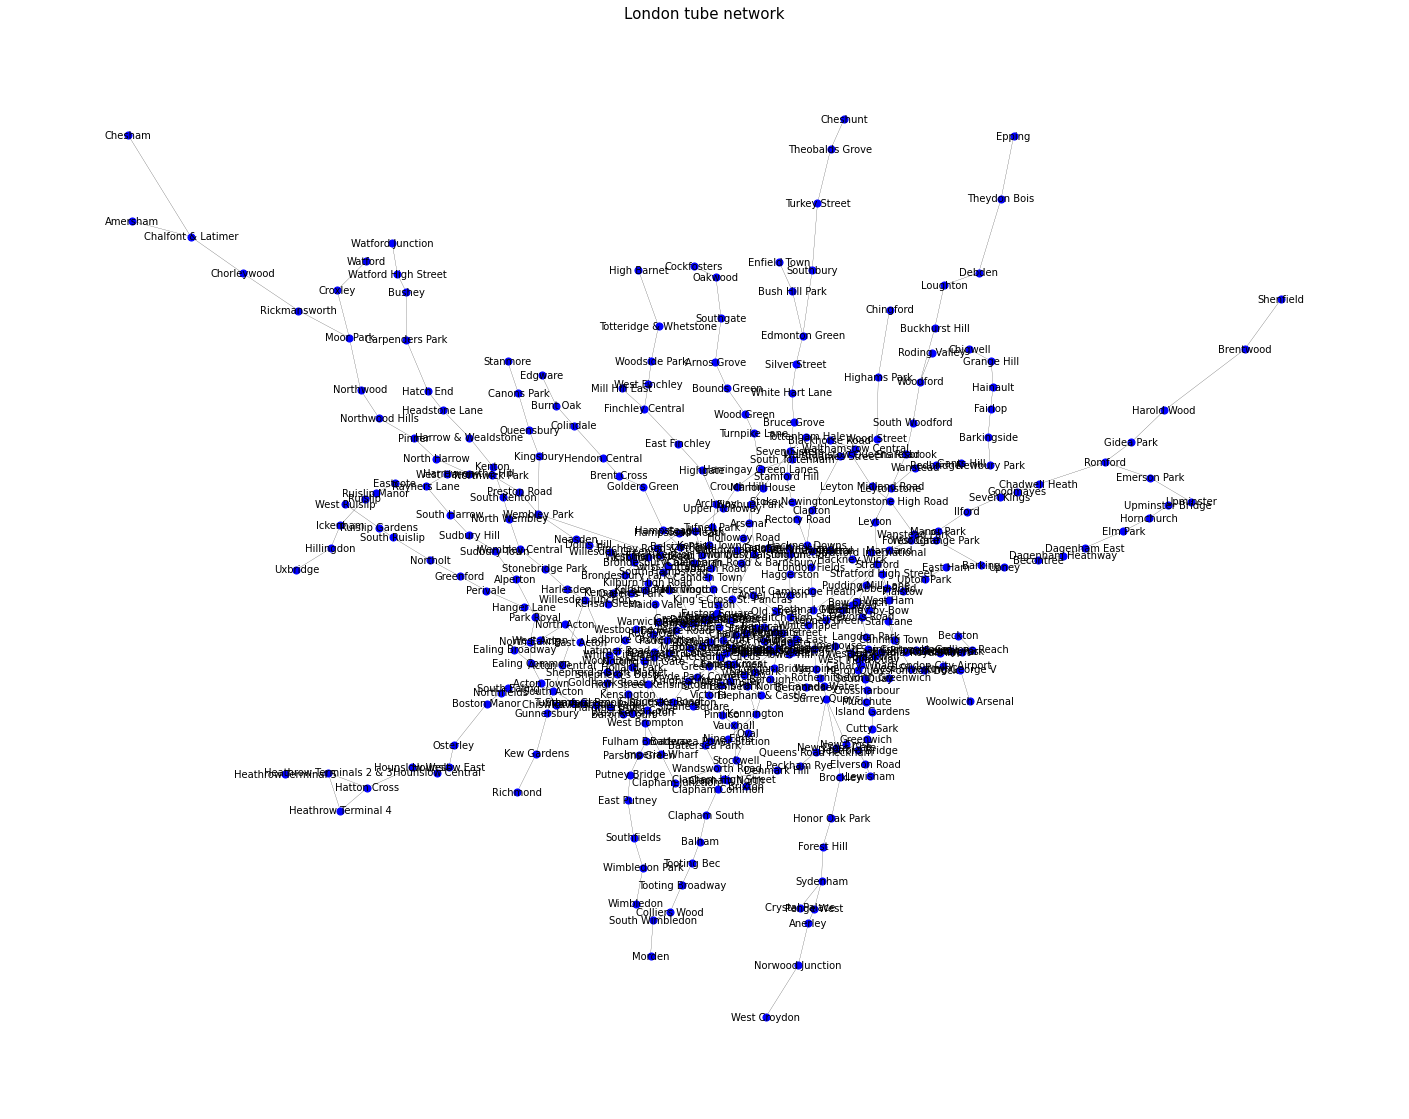

In [22]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

## 1 Part 1: London’s underground resilience

### I.1 Centrality measures

#### 1)  Degree Centrality

In [23]:
# We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [24]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


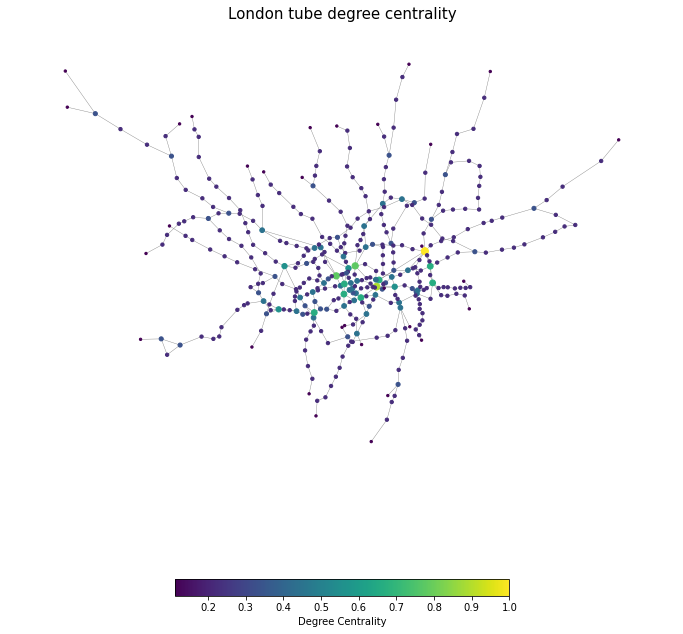

In [25]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### 2)  Betweenesss Centrality

In [26]:
### Weighted betweenness centrality:

#Let us compute the betweenness centrality for the network, considering the distance between stations:
bet_london_w=nx.betweenness_centrality(G,weight='inv_flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [27]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
Green Park,Green Park,45466.503505
Bank and Monument,Bank and Monument,40655.736170
Waterloo,Waterloo,32836.167065
Westminster,Westminster,30146.487451
Liverpool Street,Liverpool Street,27015.442539
Stratford,Stratford,26785.651639
Bond Street,Bond Street,23287.493459
Euston,Euston,22670.264058
Oxford Circus,Oxford Circus,21485.406388
Warren Street,Warren Street,20162.861623


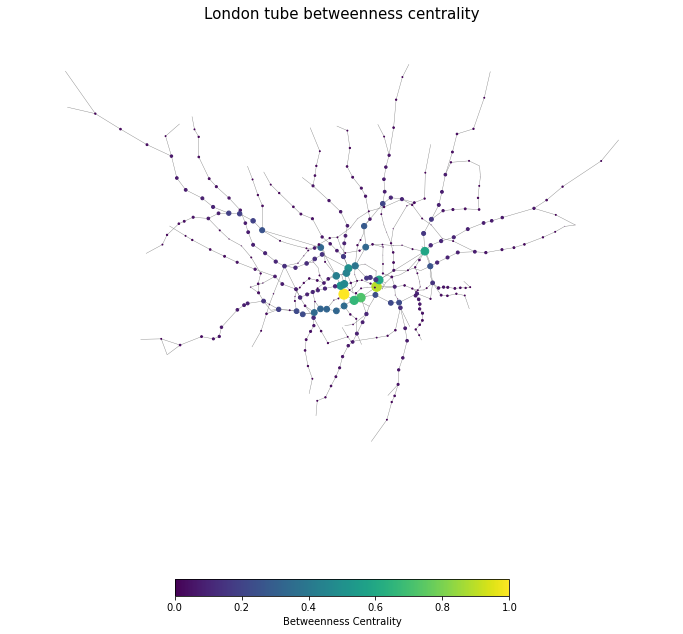

In [28]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

In [29]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


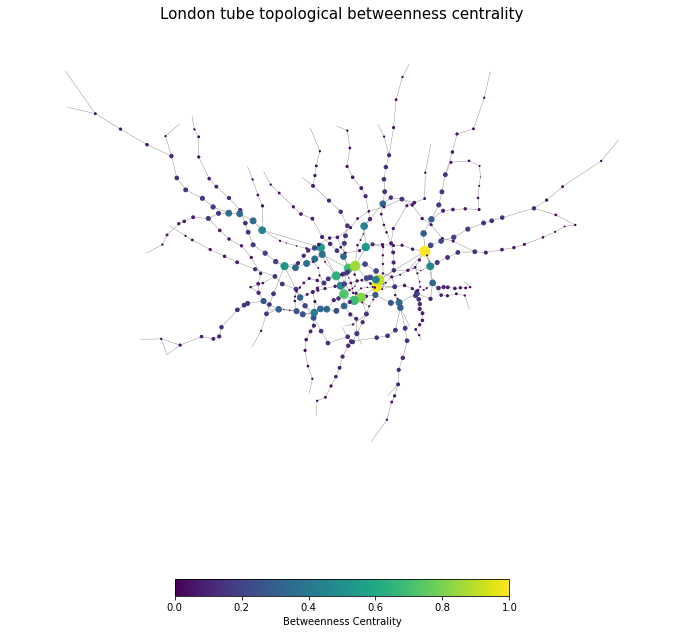

In [30]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### 3) Closeness Centrality

In [31]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,station_name,closeness_w
West Hampstead,West Hampstead,0.000006
Finchley Road & Frognal,Finchley Road & Frognal,0.000006
Brondesbury,Brondesbury,0.000006
Hampstead Heath,Hampstead Heath,0.000006
Gospel Oak,Gospel Oak,0.000006
Upper Holloway,Upper Holloway,0.000006
Crouch Hill,Crouch Hill,0.000006
Brondesbury Park,Brondesbury Park,0.000006
Harringay Green Lanes,Harringay Green Lanes,0.000006
Kentish Town West,Kentish Town West,0.000006


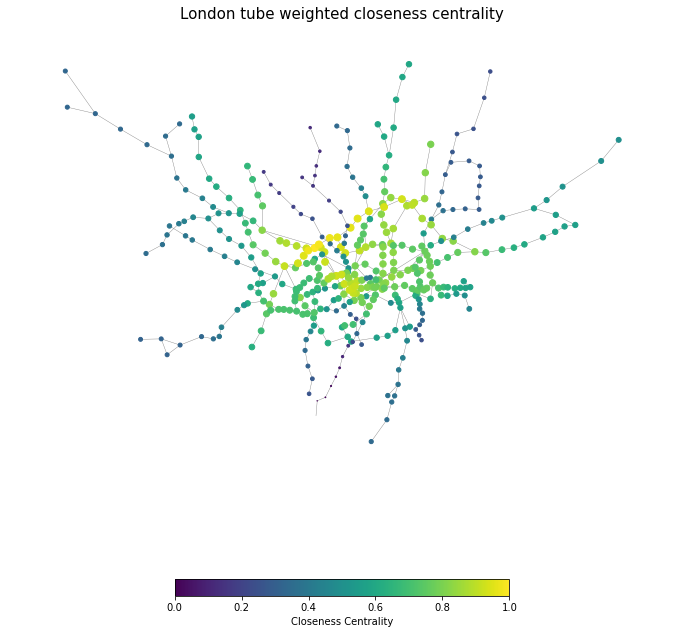

In [32]:
# Lets set color and width of nodes according to the closeness values
clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

In [33]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


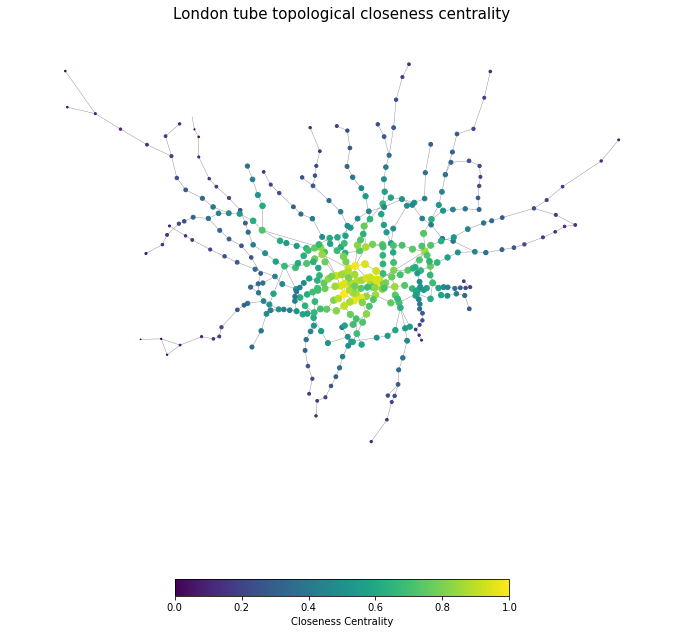

In [34]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

### I.2 Impact measures

#### 1) Global Efficiency Of Graph

In [35]:
# Calculate the global efficiency of Graph
def my_global_efficiency(Graph):
    '''author Joel C Miller
       https://stackoverflow.com/a/57032282/2966723
    '''

    n = len(Graph)
    denom = n*(n-1)
    if denom>0:
        efficiency = 0
        for path_collection in nx.all_pairs_shortest_path_length(Graph):
            source = path_collection[0]
            for target in path_collection[1]:
                if target != source:
                    efficiency += 1./path_collection[1][target]    
        return efficiency/denom
    else:
        return 0

In [36]:
my_global_efficiency(G)

0.1012561935972123

#### 2) Average Clustering Coefficient

In [37]:
def my_ave_clusterting_Coefficient(Graph):
    c = nx.clustering(Graph)
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    c_avg = sum([i[1] for i in c]) / len(c)
    return c_avg

In [38]:
my_ave_clusterting_Coefficient(G)

0.030382377389858668

#### 3) Largest connected component

In [39]:
def my_LCC(Graph):
    wholeSize = len(list(Graph.nodes))
    LCC_Size = Graph.subgraph(list(max(nx.connected_components(Graph), key=len))).number_of_nodes()
    
    return LCC_Size / wholeSize

In [40]:
my_LCC(G)

1.0

### I.3 Node removal

#### 1) No-sequential attack + ACC + Deg

In [41]:
# We can calculate the degree centrality using networkx function:
def my_degSorted(Graph):
    deg_london =nx.degree_centrality(Graph)
    nx.set_node_attributes(Graph,dict(deg_london),'degree')
    df = pd.DataFrame(index=Graph.nodes())
    df['station_name'] = pd.Series(nx.get_node_attributes(Graph, 'station_name'))
    df['degree'] = pd.Series(nx.get_node_attributes(Graph, 'degree'))
    df_sorted = df.sort_values(["degree"], ascending=False)
    return df_sorted

In [42]:
G_AD = G.copy()

In [43]:
list(G_AD.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483,
  'line_name': 'Jubilee',
  'flows': 12356,
  'station_1_': 'Wembley Park',
  'station_2_': 'Kingsbury',
  'inv_flows': 8.09e-05})

In [44]:
deg_Top10 = my_degSorted(G_AD)[0:16]

In [45]:
deg_Top10

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


In [46]:
type(deg_Top10.iloc[0,0])

str

In [47]:
deg_Top10.iloc[1,0]

'Bank and Monument'

In [48]:
# remove the node with the max value of degree centrality:
res_ACC_Deg = []
for i in range(16):
    res_ACC_Deg.append(my_ave_clusterting_Coefficient(G_AD)) 
    G_AD.remove_nodes_from([deg_Top10.iloc[i,0]])

In [49]:
res_ACC_Deg

[0.030382377389858668,
 0.030624999999999982,
 0.030027449576321738,
 0.030270399617133268,
 0.027287993282955475,
 0.020538720538720537,
 0.019071729957805903,
 0.019120135363790182,
 0.018066157760814248,
 0.019812925170068024,
 0.016879795396419435,
 0.016923076923076923,
 0.013538988860325622,
 0.013573883161512028,
 0.010335917312661501,
 0.010362694300518137]

#### 2) No-sequential attack + GE + Deg

In [50]:
G_GD = G.copy()
deg_Top10 = my_degSorted(G_GD)[0:16]
deg_Top10

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


In [51]:
# remove the node with the max value of degree centrality:
res_GE_Deg = []
for i in range(16):
    res_GE_Deg.append(my_global_efficiency(G_GD)) 
    G_GD.remove_nodes_from([deg_Top10.iloc[i,0]])

In [52]:
res_GE_Deg

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08028700838265396,
 0.07570039409751211,
 0.0740361229198828,
 0.07274535237569829,
 0.07094844226118287,
 0.06898194318071488,
 0.06825731584971681,
 0.06338447666647608,
 0.062061403668075166,
 0.056484510469093814,
 0.05381170100499209,
 0.052386574216345384,
 0.04309736951968584]

#### 3) No-sequential attack + ACC + Bet

In [53]:
# We can calculate the betweeness centrality using networkx function:
def my_betSorted(Graph):
    bet_london_t=nx.betweenness_centrality(Graph, normalized=False)
    nx.set_node_attributes(Graph,dict(bet_london_t),'betweeness_t')
    df = pd.DataFrame(index=Graph.nodes())
    df['station_name'] = pd.Series(nx.get_node_attributes(Graph, 'station_name'))
    df['betweeness_t'] = pd.Series(nx.get_node_attributes(Graph, 'betweeness_t'))
    df_sorted = df.sort_values(["betweeness_t"], ascending=False)
    return df_sorted

In [54]:
G_AB = G.copy()
bet_Top10 = my_betSorted(G_AB)[0:16]
bet_Top10

,station_name,betweeness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


In [55]:
# remove the node with the max value of betweeness centrality:
res_ACC_Bet = []
for i in range(16):
    res_ACC_Bet.append(my_ave_clusterting_Coefficient(G_AB)) 
    G_AB.remove_nodes_from([bet_Top10.iloc[i,0]])

In [56]:
res_ACC_Bet

[0.030382377389858668,
 0.030624999999999982,
 0.030027449576321738,
 0.030102895429528577,
 0.030346647475110934,
 0.029329004329004316,
 0.028306208559373106,
 0.02499395697365239,
 0.025057554828547178,
 0.021598639455782304,
 0.021653878942881493,
 0.0217094017094017,
 0.02176520994001713,
 0.02182130584192439,
 0.018863049095607234,
 0.018911917098445592]

#### 4) No-sequential attack + GE + Bet

In [57]:
G_GB = G.copy()
bet_Top10 = my_betSorted(G_GB)[0:16]
bet_Top10

,station_name,betweeness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


In [58]:
# remove the node with the max value of betweeness centrality:
res_GE_Bet = []
for i in range(16):
    res_GE_Bet.append(my_global_efficiency(G_GB)) 
    G_GB.remove_nodes_from([bet_Top10.iloc[i,0]])

In [59]:
res_GE_Bet

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08496349266423939,
 0.07849775440713821,
 0.07594226578366223,
 0.07415154167648695,
 0.06820564659789057,
 0.06765950327361094,
 0.064700058053009,
 0.06313903700825897,
 0.06169348982894085,
 0.05558101085857206,
 0.05188073920965762,
 0.04909579888292177,
 0.04719235520146342]

#### 5) No-sequential attack + ACC + Clo

In [60]:
# We can calculate the closeness centrality using networkx function:
def my_cloSorted(Graph):
    clo_london =nx.closeness_centrality(Graph)
    nx.set_node_attributes(Graph,dict(clo_london),'closeness_t')
    df = pd.DataFrame(index=Graph.nodes())
    df['station_name'] = pd.Series(nx.get_node_attributes(Graph, 'station_name'))
    df['closeness_t'] = pd.Series(nx.get_node_attributes(Graph, 'closeness_t'))
    df_sorted = df.sort_values(["closeness_t"], ascending=False)
    return df_sorted

In [61]:
G_AC = G.copy()
clo_Top = my_cloSorted(G_AC)[0:16]
clo_Top

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


In [62]:
# remove the node with the max value of closeness centrality:
res_ACC_Clo = []
for i in range(16):
    res_ACC_Clo.append(my_ave_clusterting_Coefficient(G_AC)) 
    G_AC.remove_nodes_from([clo_Top.iloc[i,0]])

In [63]:
res_ACC_Clo

[0.030382377389858668,
 0.029791666666666657,
 0.029275569877073627,
 0.02951663077291217,
 0.028079644956219254,
 0.02815055315055314,
 0.02990958408679927,
 0.030033840947546523,
 0.030110262934690407,
 0.030187074829931965,
 0.030264279624893427,
 0.030341880341880335,
 0.02699228791773778,
 0.027061855670103083,
 0.027131782945736423,
 0.02357512953367874]

#### 6) No-sequential attack + GE + Clo

In [64]:
G_GC = G.copy()
clo_Top = my_cloSorted(G_GC)[0:16]
clo_Top

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


In [65]:
# remove the node with the max value of closeness centrality:
res_GE_Clo = []
for i in range(16):
    res_GE_Clo.append(my_global_efficiency(G_GC)) 
    G_GC.remove_nodes_from([clo_Top.iloc[i,0]])

In [66]:
res_GE_Clo

[0.1012561935972123,
 0.09918991960788402,
 0.09487232544791133,
 0.08793385149140875,
 0.08737164566976727,
 0.08485943799789313,
 0.08278135073141742,
 0.08258086417012774,
 0.08260040537396239,
 0.08262233108950982,
 0.08166991436767818,
 0.08129480948420958,
 0.07219763172344766,
 0.07257074609927944,
 0.07294676032777311,
 0.07090122136724887]

#### 7) Sequential attack + ACC + Deg

In [67]:
G_S_AD = G.copy()
deg_Top = my_degSorted(G_S_AD)[0:16]
deg_Top

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


In [68]:
# remove the node with the max value of deg centrality:
res_S_ACC_Deg = []
for i in range(16):
    res_S_ACC_Deg.append(my_ave_clusterting_Coefficient(G_S_AD)) 
    G_S_AD.remove_nodes_from([deg_Top.iloc[0,0]])
    #print(deg_Top.iloc[0,0])
    deg_Top = my_degSorted(G_S_AD)[0:1]
    
res_S_ACC_Deg

[0.030382377389858668,
 0.030624999999999982,
 0.030027449576321738,
 0.02705192629815743,
 0.027287993282955475,
 0.020538720538720537,
 0.019493670886075946,
 0.016582064297800337,
 0.01662425784563189,
 0.013435374149659868,
 0.015174765558397273,
 0.013675213675213677,
 0.013710368466152529,
 0.010309278350515465,
 0.010335917312661501,
 0.010362694300518137]

#### 8) Sequential attack + ACC + Bet

In [69]:
G_S_AB = G.copy()
bet_Top = my_betSorted(G_S_AB)[0:16]
bet_Top

,station_name,betweeness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


In [70]:
# remove the node with the max value of bet centrality:
res_S_ACC_Bet = []
for i in range(16):
    res_S_ACC_Bet.append(my_ave_clusterting_Coefficient(G_S_AB)) 
    G_S_AB.remove_nodes_from([bet_Top.iloc[0,0]])
    #print(deg_Top.iloc[0,0])
    bet_Top = my_betSorted(G_S_AB)[0:1]
    
res_S_ACC_Bet

[0.030382377389858668,
 0.030624999999999982,
 0.030868838763575587,
 0.029971284996410608,
 0.029255127743792717,
 0.029329004329004316,
 0.02940325497287521,
 0.022625090645395207,
 0.022682660850599775,
 0.019339164237123417,
 0.016283034953111678,
 0.01307692307692308,
 0.010111396743787488,
 0.010137457044673538,
 0.01016365202411714,
 0.010189982728842832]

#### 9) Sequential attack + ACC + Clo

In [71]:
G_S_AC = G.copy()
clo_Top = my_cloSorted(G_S_AC)[0:16]
clo_Top

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


In [72]:
# remove the node with the max value of clo centrality:
res_S_ACC_Clo = []
for i in range(16):
    res_S_ACC_Clo.append(my_ave_clusterting_Coefficient(G_S_AC)) 
    G_S_AC.remove_nodes_from([clo_Top.iloc[0,0]])
    #print(deg_Top.iloc[0,0])
    clo_Top = my_cloSorted(G_S_AC)[0:1]
    
res_S_ACC_Clo

[0.030382377389858668,
 0.029791666666666657,
 0.030033416875522127,
 0.028715003589375437,
 0.028079644956219254,
 0.02815055315055314,
 0.0282218203737191,
 0.028378051728305525,
 0.021580031503695623,
 0.021635082604470356,
 0.023395445134575553,
 0.025164835164835152,
 0.02522952625780388,
 0.025294550810014714,
 0.025359911406423023,
 0.025425610658771268]

#### 10) Sequential attack + GE + Deg

In [73]:
G_S_GD = G.copy()
deg_Top = my_degSorted(G_S_GD)[0:16]
deg_Top

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


In [74]:
# remove the node with the max value of deg centrality:
res_S_GE_Deg = []
for i in range(16):
    res_S_GE_Deg.append(my_global_efficiency(G_S_GD)) 
    G_S_GD.remove_nodes_from([deg_Top.iloc[0,0]])
    #print(deg_Top.iloc[0,0])
    deg_Top = my_degSorted(G_S_GD)[0:1]
    
res_S_GE_Deg

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08203328759057034,
 0.07570039409751211,
 0.0740361229198828,
 0.07300367580539921,
 0.0677717604548151,
 0.06012752519564628,
 0.05814535563710196,
 0.05685866730429425,
 0.05472864295219614,
 0.05198996377626295,
 0.04835902960809039,
 0.04385466190156381,
 0.043141993753852824]

#### 11) Sequential attack + GE + Bet

In [75]:
G_S_GB = G.copy()
bet_Top = my_betSorted(G_S_GB)[0:16]
bet_Top

,station_name,betweeness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


In [76]:
# remove the node with the max value of bet centrality:
res_S_GE_Bet = []
for i in range(16):
    res_S_GE_Bet.append(my_global_efficiency(G_S_GB)) 
    G_S_GB.remove_nodes_from([bet_Top.iloc[0,0]])
    #print(deg_Top.iloc[0,0])
    bet_Top = my_betSorted(G_S_GB)[0:1]
    
res_S_GE_Bet

[0.1012561935972123,
 0.08891736066510689,
 0.08460293133575152,
 0.08182895253292936,
 0.07767794342812263,
 0.07283234083472483,
 0.053210203984026455,
 0.05165629952389727,
 0.0458442134055722,
 0.04163076968121037,
 0.0381637040943985,
 0.032996526260496956,
 0.03126530049230251,
 0.027469532179724216,
 0.024872641506986266,
 0.02258304323825636]

#### 12) Sequential attack + GE + Clo

In [77]:
G_S_GC = G.copy()
clo_Top = my_cloSorted(G_S_GC)[0:16]
clo_Top

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


In [78]:
# remove the node with the max value of clo centrality:
res_S_GE_Clo = []
for i in range(16):
    res_S_GE_Clo.append(my_global_efficiency(G_S_GC)) 
    G_S_GC.remove_nodes_from([clo_Top.iloc[0,0]])
    #print(deg_Top.iloc[0,0])
    clo_Top = my_cloSorted(G_S_GC)[0:1]
    
res_S_GE_Clo

[0.1012561935972123,
 0.09918991960788402,
 0.09443475025566316,
 0.09181648060183005,
 0.08542563066911478,
 0.08054424756502003,
 0.05810104159173278,
 0.051883620553389555,
 0.05035000093626794,
 0.04439458727102797,
 0.04295771061337044,
 0.041119379269026736,
 0.04057806342051627,
 0.0367727528581859,
 0.03440830653491251,
 0.030708932161676784]

#### 13)Non-Sequential attack + LCC + Deg

In [79]:
G_LD = G.copy()
deg_Top = my_degSorted(G_LD)[0:16]
deg_Top

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


In [80]:
# remove the node with the max value of closeness centrality:
res_LCC_Deg = []
for i in range(16):
    res_LCC_Deg.append(my_LCC(G_LD)) 
    G_LD.remove_nodes_from([deg_Top.iloc[i,0]])
res_LCC_Deg

[1.0,
 0.9475,
 0.9473684210526315,
 0.9472361809045227,
 0.9420654911838791,
 0.9419191919191919,
 0.9392405063291139,
 0.9263959390862944,
 0.926208651399491,
 0.9260204081632653,
 0.8925831202046036,
 0.8846153846153846,
 0.8277634961439588,
 0.8247422680412371,
 0.8242894056847545,
 0.7772020725388601]

#### 14)Non-Sequential attack + LCC + Bet

In [81]:
G_LB = G.copy()
bet_Top = my_betSorted(G_LB)[0:16]
bet_Top

,station_name,betweeness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


In [82]:
# remove the node with the max value of closeness centrality:
res_LCC_Bet = []
for i in range(16):
    res_LCC_Bet.append(my_LCC(G_LB)) 
    G_LB.remove_nodes_from([bet_Top.iloc[i,0]])
res_LCC_Bet

[1.0,
 0.9475,
 0.9473684210526315,
 0.9472361809045227,
 0.9345088161209067,
 0.9343434343434344,
 0.9341772151898734,
 0.8781725888324873,
 0.8778625954198473,
 0.8724489795918368,
 0.8670076726342711,
 0.8666666666666667,
 0.8329048843187661,
 0.7860824742268041,
 0.7803617571059431,
 0.7694300518134715]

#### 15)Non-Sequential attack + LCC + Clo

In [83]:
G_LC = G.copy()
clo_Top = my_cloSorted(G_LC)[0:16]
clo_Top

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


In [84]:
# remove the node with the max value of closeness centrality:
res_LCC_Clo = []
for i in range(16):
    res_LCC_Clo.append(my_LCC(G_LC)) 
    G_LC.remove_nodes_from([clo_Top.iloc[i,0]])
res_LCC_Clo

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9948849104859335,
 0.9948717948717949,
 0.897172236503856,
 0.8994845360824743,
 0.9018087855297158,
 0.8937823834196891]

#### 16)Sequential attack + LCC + Deg

In [85]:
G_S_LD = G.copy()
deg_Top = my_degSorted(G_S_LD)[0:16]
deg_Top

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


In [86]:
# remove the node with the max value of deg centrality:
res_S_LCC_Deg = []
for i in range(16):
    res_S_LCC_Deg.append(my_LCC(G_S_LD)) 
    G_S_LD.remove_nodes_from([deg_Top.iloc[0,0]])
    deg_Top = my_degSorted(G_S_LD)[0:1]
    
res_S_LCC_Deg

[1.0,
 0.9475,
 0.9473684210526315,
 0.9472361809045227,
 0.9420654911838791,
 0.9419191919191919,
 0.9417721518987342,
 0.9086294416243654,
 0.8753180661577609,
 0.8622448979591837,
 0.8593350383631714,
 0.8589743589743589,
 0.8483290488431876,
 0.7963917525773195,
 0.7674418604651163,
 0.7590673575129534]

#### 17)Sequential attack + LCC + Bet

In [87]:
G_S_LB = G.copy()
bet_Top = my_betSorted(G_S_LB)[0:16]
bet_Top

,station_name,betweeness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


In [88]:
# remove the node with the max value of bet centrality:
res_S_LCC_Bet = []
for i in range(16):
    res_S_LCC_Bet.append(my_LCC(G_S_LB)) 
    G_S_LB.remove_nodes_from([bet_Top.iloc[0,0]])
    bet_Top = my_betSorted(G_S_LB)[0:1]
    
res_S_LCC_Bet

[1.0,
 0.9475,
 0.9473684210526315,
 0.9472361809045227,
 0.947103274559194,
 0.946969696969697,
 0.5746835443037974,
 0.5736040609137056,
 0.49872773536895676,
 0.4413265306122449,
 0.43478260869565216,
 0.3769230769230769,
 0.37017994858611825,
 0.26804123711340205,
 0.26098191214470284,
 0.18134715025906736]

#### 18)Sequential attack + LCC + Clo

In [89]:
G_S_LC = G.copy()
clo_Top = my_cloSorted(G_S_LC)[0:16]
clo_Top

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


In [90]:
# remove the node with the max value of clo centrality:
res_S_LCC_Clo = []
for i in range(16):
    res_S_LCC_Clo.append(my_LCC(G_S_LC)) 
    G_S_LC.remove_nodes_from([clo_Top.iloc[0,0]])
    clo_Top = my_cloSorted(G_S_LC)[0:1]
    
res_S_LCC_Clo

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5721518987341773,
 0.5736040609137056,
 0.5725190839694656,
 0.49744897959183676,
 0.4961636828644501,
 0.4948717948717949,
 0.4961439588688946,
 0.4536082474226804,
 0.45478036175710596,
 0.45595854922279794]

### I.3.2 Plot Plot Plot

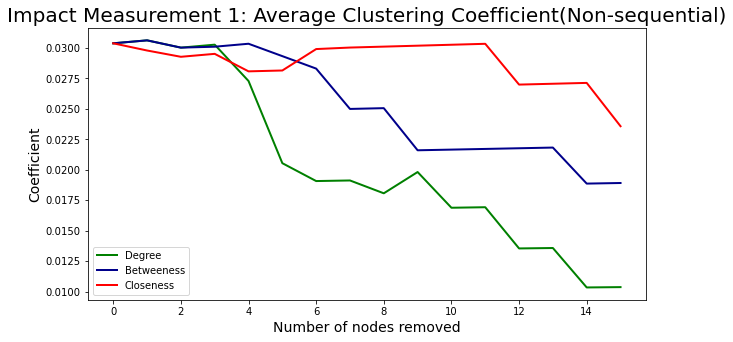

In [91]:
# plot the line chart:ACC
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Impact Measurement 1: Average Clustering Coefficient(Non-sequential)',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'Number of nodes removed',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'Coefficient',fontsize=14)#设置y轴，并设定字号大小
 
#color：颜色，linewidth：线宽，linestyle：线条类型，label：图例，marker：数据点的类型
in1, = plt.plot(res_ACC_Deg,color="green",linewidth=2)
in2, = plt.plot(res_ACC_Bet,color="darkblue",linewidth=2)
in3, = plt.plot(res_ACC_Clo,color="red",linewidth=2)
 
plt.legend(handles = [in1,in2,in3],labels=['Degree','Betweeness','Closeness'],loc=3)#图例展示位置，数字代表第几象限
plt.show()#显示图像

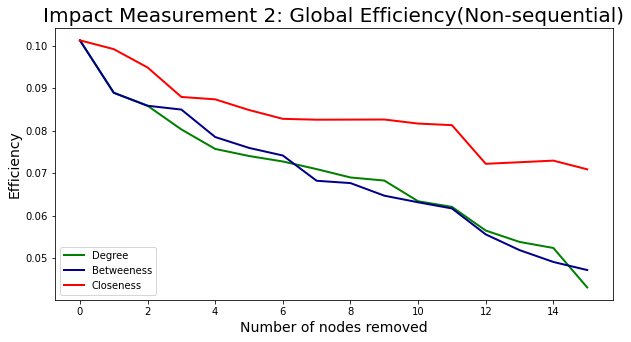

In [92]:
# plot the line chart:GE
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Impact Measurement 2: Global Efficiency(Non-sequential)',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'Number of nodes removed',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'Efficiency',fontsize=14)#设置y轴，并设定字号大小
 
#color：颜色，linewidth：线宽，linestyle：线条类型，label：图例，marker：数据点的类型
in1, = plt.plot(res_GE_Deg,color="green",linewidth=2)
in2, = plt.plot(res_GE_Bet,color="darkblue",linewidth=2)
in3, = plt.plot(res_GE_Clo,color="red",linewidth=2)
 
plt.legend(handles = [in1,in2,in3],labels=['Degree','Betweeness','Closeness'],loc=3)#图例展示位置，数字代表第几象限
plt.show()#显示图像

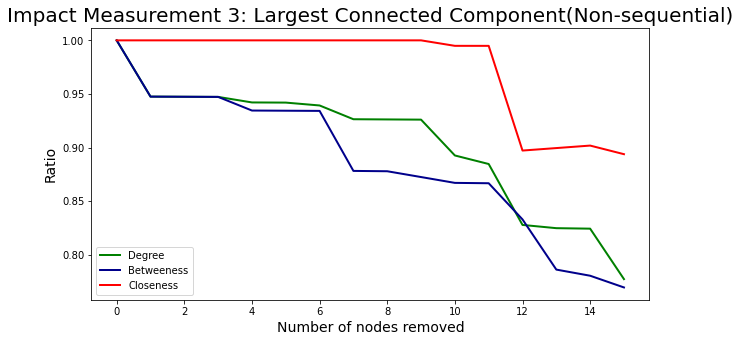

In [93]:
# plot the line chart:LCC
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Impact Measurement 3: Largest Connected Component(Non-sequential)',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'Number of nodes removed',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'Ratio',fontsize=14)#设置y轴，并设定字号大小
 
#color：颜色，linewidth：线宽，linestyle：线条类型，label：图例，marker：数据点的类型
in1, = plt.plot(res_LCC_Deg,color="green",linewidth=2)
in2, = plt.plot(res_LCC_Bet,color="darkblue",linewidth=2)
in3, = plt.plot(res_LCC_Clo,color="red",linewidth=2)
 
plt.legend(handles = [in1,in2,in3],labels=['Degree','Betweeness','Closeness'],loc=3)#图例展示位置，数字代表第几象限
plt.show()#显示图像

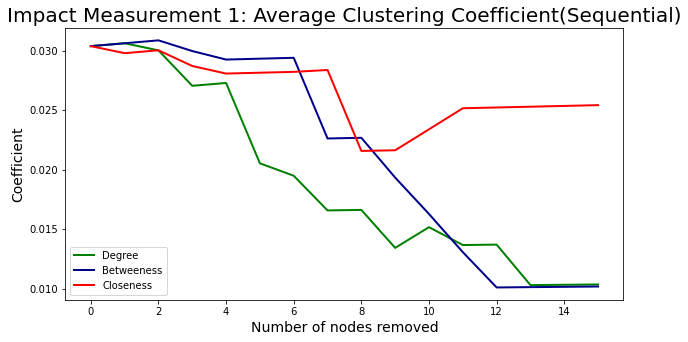

In [94]:
# plot the line chart: S_ACC
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Impact Measurement 1: Average Clustering Coefficient(Sequential)',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'Number of nodes removed',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'Coefficient',fontsize=14)#设置y轴，并设定字号大小
 
#color：颜色，linewidth：线宽，linestyle：线条类型，label：图例，marker：数据点的类型
in1, = plt.plot(res_S_ACC_Deg,color="green",linewidth=2)
in2, = plt.plot(res_S_ACC_Bet,color="darkblue",linewidth=2)
in3, = plt.plot(res_S_ACC_Clo,color="red",linewidth=2)
 
plt.legend(handles = [in1,in2,in3],labels=['Degree','Betweeness','Closeness'],loc=3)#图例展示位置，数字代表第几象限
plt.show()#显示图像

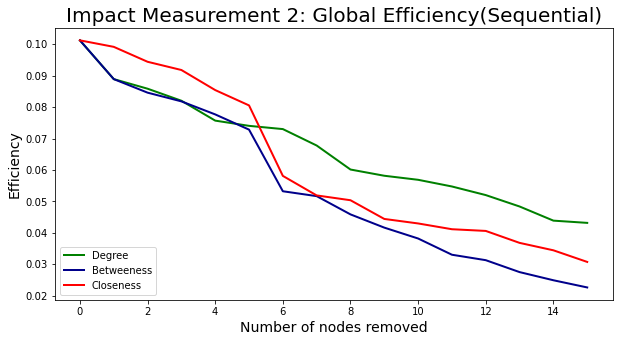

In [95]:
# plot the line chart: S_GE
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Impact Measurement 2: Global Efficiency(Sequential)',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'Number of nodes removed',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'Efficiency',fontsize=14)#设置y轴，并设定字号大小
 
#color：颜色，linewidth：线宽，linestyle：线条类型，label：图例，marker：数据点的类型
in1, = plt.plot(res_S_GE_Deg,color="green",linewidth=2)
in2, = plt.plot(res_S_GE_Bet,color="darkblue",linewidth=2)
in3, = plt.plot(res_S_GE_Clo,color="red",linewidth=2)
 
plt.legend(handles = [in1,in2,in3],labels=['Degree','Betweeness','Closeness'],loc=3)#图例展示位置，数字代表第几象限
plt.show()#显示图像

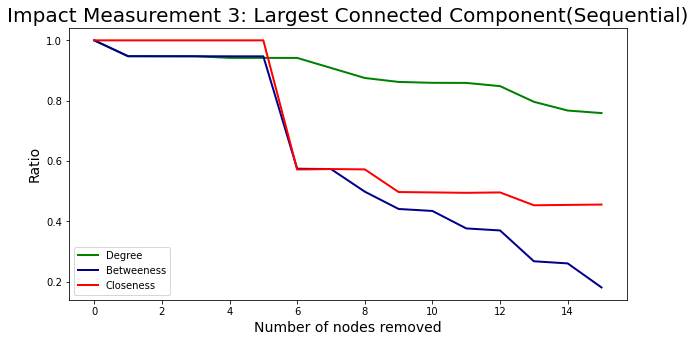

In [96]:
# plot the line chart: S_LCC
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Impact Measurement 3: Largest Connected Component(Sequential)',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'Number of nodes removed',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'Ratio',fontsize=14)#设置y轴，并设定字号大小
 
#color：颜色，linewidth：线宽，linestyle：线条类型，label：图例，marker：数据点的类型
in1, = plt.plot(res_S_LCC_Deg,color="green",linewidth=2)
in2, = plt.plot(res_S_LCC_Bet,color="darkblue",linewidth=2)
in3, = plt.plot(res_S_LCC_Clo,color="red",linewidth=2)
 
plt.legend(handles = [in1,in2,in3],labels=['Degree','Betweeness','Closeness'],loc=3)#图例展示位置，数字代表第几象限
plt.show()#显示图像

### II.Flows: weighted network

### II.1 Weighted betweeness centrality

In [97]:
# To dataframe using the nodes as the index
def my_weighted_Betweeness(Graph):
    bet_london_w=nx.betweenness_centrality(Graph,weight='inv_flows',normalized=False)
    nx.set_node_attributes(Graph,bet_london_w,'betweenness_w')
    df = pd.DataFrame(index=Graph.nodes())
    df['station_name'] = pd.Series(nx.get_node_attributes(Graph, 'station_name'))
    df['betweenness_w'] = pd.Series(nx.get_node_attributes(Graph, 'betweenness_w'))
    df_sorted = df.sort_values(["betweenness_w"], ascending=False)
    return df_sorted

In [98]:
top_Bet_w = my_weighted_Betweeness(G)[0:10]
top_Bet_w

,station_name,betweenness_w
Green Park,Green Park,45466.503505
Bank and Monument,Bank and Monument,40655.736170
Waterloo,Waterloo,32836.167065
Westminster,Westminster,30146.487451
Liverpool Street,Liverpool Street,27015.442539
Stratford,Stratford,26785.651639
Bond Street,Bond Street,23287.493459
Euston,Euston,22670.264058
Oxford Circus,Oxford Circus,21485.406388
Warren Street,Warren Street,20162.861623


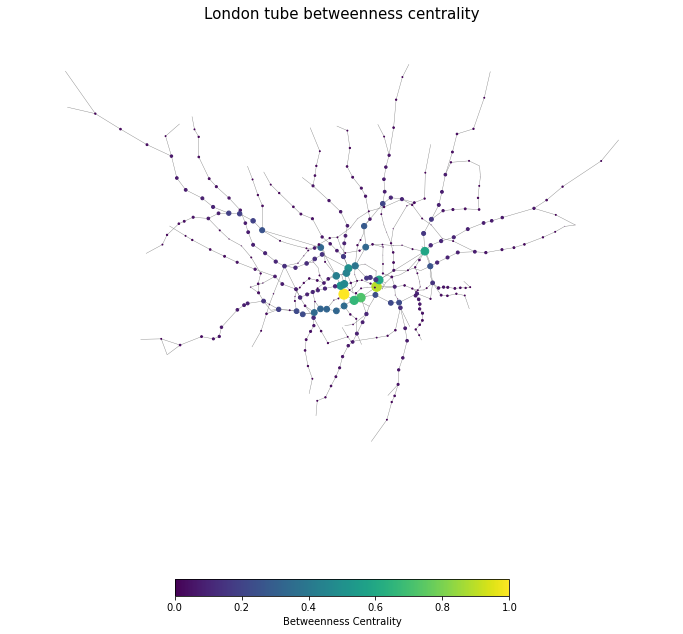

In [99]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

### II.2 Weighted impact measures

#### 1) Weighted Global Efficiency

In [100]:
# Calculates global efficiency for a weighted graph
def efficiency_weighted(G, u, v, weight):
   try:
       eff = 1 / nx.shortest_path_length(G, u, v, weight='inv_flows')
   except NetworkXNoPath:
       eff = 0
   return eff

def global_efficiency_weighted(G):
   n = len(G)
   denom = n * (n - 1)
   if denom != 0:
       g_eff = sum(efficiency_weighted(G, u, v, weight='inv_flows') for u, v in G.edges()) / denom
   else:
       g_eff = 0
   return g_eff

In [101]:
GE_W = global_efficiency_weighted(G)
GE_W

62.54367637104637

In [102]:
# Calculate the global efficiency of Graph
def my_global_efficiency_w(Graph):
    n = len(Graph)
    denom = n * (n - 1)
    if denom != 0:
        lengths = nx.all_pairs_dijkstra_path_length(Graph, weight = 'inv_flows')
        g_eff = 0
        for source, targets in lengths:
            for target, distance in targets.items():
                if distance > 0:
                    g_eff += 1 / distance
        g_eff /= denom
    else:
        g_eff = 0
        
    return g_eff

In [103]:
my_global_efficiency_w(G)

2649.0447238941165

#### 2) Weighted Clustering Coefficient

In [104]:
myWCC = nx.average_clustering(G, weight='inv_flows', count_zeros=True)
myWCC

7.489652415674563e-18

#### 3) LCC(ignore weights)

In [105]:
my_LCC(G)

1.0

## II.3

In [106]:
G1 = G.copy()
G2 = G.copy()

In [107]:
top_Bet = my_betSorted(G)[0:10]
top_Bet_w = my_weighted_Betweeness(G)[0:10]

In [108]:
top_Bet

,station_name,betweeness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


In [109]:
top_Bet_w

,station_name,betweenness_w
Green Park,Green Park,45466.503505
Bank and Monument,Bank and Monument,40655.736170
Waterloo,Waterloo,32836.167065
Westminster,Westminster,30146.487451
Liverpool Street,Liverpool Street,27015.442539
Stratford,Stratford,26785.651639
Bond Street,Bond Street,23287.493459
Euston,Euston,22670.264058
Oxford Circus,Oxford Circus,21485.406388
Warren Street,Warren Street,20162.861623


In [110]:
top_Bet.iloc[0,0]

'Stratford'

In [111]:
top_Bet_w.iloc[0,0]

'Green Park'

In [112]:
# remove "Stratford" from G1
G1.remove_nodes_from([top_Bet.iloc[0,0]])
# remove "Green Park" from G2
G2.remove_nodes_from([top_Bet_w.iloc[0,0]])

In [113]:
# Without removal
non_removal_GE = my_global_efficiency_w(G)
non_removal_LCC = my_LCC(G)
unweighted_removal_GE = my_global_efficiency_w(G1)
unweighted_removal_LCC = my_LCC(G1)
weighted_removal_GE = my_global_efficiency_w(G2)
weighted_removal_LCC = my_LCC(G2)

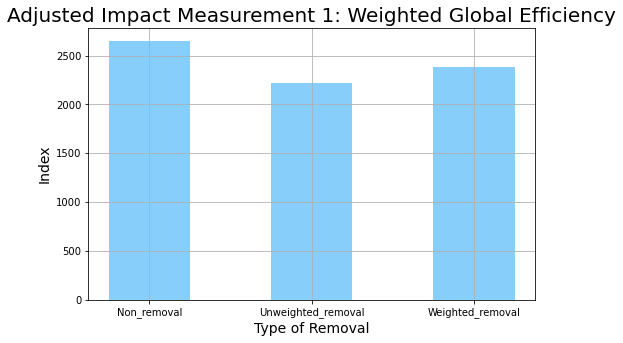

In [114]:
# Plot WGE
X=['Non_removal', 'Unweighted_removal', 'Weighted_removal']
Y=[non_removal_GE,unweighted_removal_GE,weighted_removal_GE]  

plt.figure(figsize=(8,5))#设置画布的尺寸
plt.title('Adjusted Impact Measurement 1: Weighted Global Efficiency',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'Type of Removal',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'Index',fontsize=14)#设置y轴，并设定字号大小
plt.grid(True)
plt.bar(X,Y,0.5,color="lightskyblue")

plt.show() 

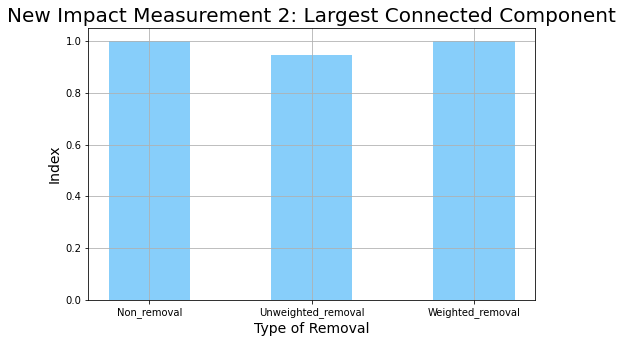

In [115]:
# Plot LCC
X=['Non_removal', 'Unweighted_removal', 'Weighted_removal']
Y=[non_removal_LCC,unweighted_removal_LCC,weighted_removal_LCC]  

plt.figure(figsize=(8,5))#设置画布的尺寸
plt.title('New Impact Measurement 2: Largest Connected Component',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'Type of Removal',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'Index',fontsize=14)#设置y轴，并设定字号大小
plt.grid(True)
plt.bar(X,Y,0.5,color="lightskyblue")

plt.show() 

## Part2: Spatial interaction models

## III. Models and calibration

III.1 四个模型，uncontrained, production con, attraction con, double con

## III.2 Production-constrained Model 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [4]:
# Read London commuting data
cdata = pd.read_csv('data/london_flows.csv')
cdata.rename(columns = {"population": "Oi_origpop", "jobs": "Dj_destjob", "distance": "Dist"}, inplace = True)
cdata.head(10)

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,Dist
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
5,Abbey Road,Crossharbour,1,599,1208,6686.475560
6,Abbey Road,Custom House,0,599,845,3824.855630
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909
8,Abbey Road,Cyprus,7,599,850,6532.099618
9,Abbey Road,Devons Road,1,599,611,3958.324171


In [5]:
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
cdatamat = pd.pivot_table(cdata, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["Oi_origpop", "Dj_destjob", "Dist"]
log_x_vars = []
for x in x_variables:
    cdata[f"log_{x}"] = np.log(cdata[x] + 1e-5)
    log_x_vars.append(f"log_{x}")

cdata.head()

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,Dist,log_Oi_origpop,log_Dj_destjob,log_Dist
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274


In [7]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_Dj_destjob + log_Dist-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=cdata, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2520e+06
Date:                Mon, 02 May 2022   Deviance:                   2.3319e+06
Time:                        18:03:07   Pearson chi2:                 4.64e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### Model Estimates

In [8]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdata = cdata.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdata.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdata = cdata.merge(D_j, on = "station_destination", how = "left" )

In [9]:
cdata.head()

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,Dist,log_Oi_origpop,log_Dj_destjob,log_Dist,O_i,D_j
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428


In [10]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdata = cdata.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdata.drop(columns = ["coef"], inplace = True)
#check this has worked
cdata.head()

/var/folders/kk/73c29kwn5bs0b13dqx3fdm240000gn/T/ipykernel_78552/3263331607.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,Dist,log_Oi_origpop,log_Dj_destjob,log_Dist,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,-3.584653
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,-3.584653
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,-3.584653
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,-3.584653
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,-3.584653


In [11]:
alpha_i = prodSim.params[0:398]
gamma = prodSim.params[399]
beta = -prodSim.params[400]

In [12]:
gamma

0.8228778462203863

In [13]:
cdata["prodsimest1"] = np.exp(cdata["alpha_i"]+gamma*cdata["log_Dj_destjob"] 
                                 - beta*cdata["log_Dist"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
cdata.head(10)

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,Dist,log_Oi_origpop,log_Dj_destjob,log_Dist,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,-3.584653,141.172038
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,-3.584653,1.980979
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,-3.584653,2.964045
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,-3.584653,115.570353
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,-3.584653,41.146826
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,599,1208,-3.584653,4.621666
6,Abbey Road,Custom House,0,599,845,3824.855630,6.395262,6.739337,8.249276,599,845,-3.584653,3.606024
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,6.395262,7.466228,9.048280,599,1748,-3.584653,6.141327
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.395262,6.745236,8.784484,599,850,-3.584653,3.467545
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,599,611,-3.584653,2.753782


### Assessing the model output

In [14]:
#first round the estimates
cdata["prodsimest1"] = round(cdata["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
cdatamat2 = cdata.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,23.0,23.0,NaN,4.0,1.0,NaN,24.0,...,19.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,3737.0
Aldgate,NaN,NaN,6.0,NaN,20.0,NaN,NaN,1.0,NaN,19.0,...,14.0,NaN,6.0,4.0,NaN,2.0,NaN,2.0,NaN,2886.0
Aldgate East,NaN,NaN,6.0,22.0,NaN,NaN,2.0,1.0,NaN,21.0,...,15.0,2.0,6.0,5.0,NaN,2.0,NaN,3.0,NaN,3176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,10.0,31.0,32.0,NaN,NaN,NaN,NaN,32.0,...,25.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,4873.0
Woodgrange Park,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,7.0,20.0,21.0,NaN,3.0,NaN,NaN,21.0,...,16.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3096.0


In [15]:
CalcRSquared(cdata["flows"], cdata["prodsimest1"])

0.32014873521971576

In [16]:
CalcRMSE(cdata["flows"], cdata["prodsimest1"])

108.422

## IV. What if... Scenarios

### IV.1 Scenario A

In [17]:
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["Dj_destjob"]/2
    else:
        val = row["Dj_destjob"]
    return val
        
cdata["Dj_destjobScenario"] = cdata.apply(new_sal, axis =1)

cdata[cdata["station_destination"].isin(['Canary Wharf'])]

,station_origin,station_destination,flows,Oi_origpop,Dj_destjob,Dist,log_Oi_origpop,log_Dj_destjob,log_Dist,O_i,D_j,alpha_i,prodsimest1,Dj_destjobScenario
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,-3.584653,116.0,29386.0
126,Acton Town,Canary Wharf,57,3745,58772,20398.165882,8.228177,10.981421,9.923200,3745,58772,-3.436399,120.0,29386.0
348,Aldgate,Canary Wharf,1,2886,58772,6564.419680,7.967627,10.981421,8.789419,2886,58772,-3.784417,93.0,29386.0
595,Aldgate East,Canary Wharf,3,3172,58772,5127.998899,8.062118,10.981421,8.542471,3172,58772,-3.703238,103.0,29386.0
817,All Saints,Canary Wharf,67,740,58772,1340.088733,6.606650,10.981421,7.200491,740,58772,-3.438597,149.0,29386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60595,Wood Green,Canary Wharf,64,6667,58772,16849.246595,8.804925,10.981421,9.732061,6667,58772,-2.884527,211.0,29386.0
60838,Wood Lane,Canary Wharf,0,1088,58772,17092.091760,6.992096,10.981421,9.746371,1088,58772,-4.575759,39.0,29386.0
61062,Woodford,Canary Wharf,192,4868,58772,13963.787075,8.490438,10.981421,9.544223,4868,58772,-3.135235,167.0,29386.0
61294,Woodside Park,Canary Wharf,42,3093,58772,22356.567178,8.036897,10.981421,10.014875,3093,58772,-3.558043,105.0,29386.0


In [18]:
cdata["prodsimest2"] = np.exp(cdata["alpha_i"]+gamma*np.log(cdata["Dj_destjobScenario"]) - beta*cdata["log_Dist"])

cdata["prodsimest2"] = round(cdata["prodsimest2"],0)
#now we can convert the pivot table into a matrix
cdatamat3 = cdata.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat3

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,549.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,23.0,23.0,NaN,4.0,1.0,NaN,24.0,...,19.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,3685.0
Aldgate,NaN,NaN,6.0,NaN,20.0,NaN,NaN,1.0,NaN,19.0,...,14.0,NaN,6.0,4.0,NaN,2.0,NaN,2.0,NaN,2845.0
Aldgate East,NaN,NaN,6.0,22.0,NaN,NaN,2.0,1.0,NaN,21.0,...,15.0,2.0,6.0,5.0,NaN,2.0,NaN,3.0,NaN,3131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,10.0,31.0,32.0,NaN,NaN,NaN,NaN,32.0,...,25.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,4800.0
Woodgrange Park,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,7.0,20.0,21.0,NaN,3.0,NaN,NaN,21.0,...,16.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3050.0


In [19]:
#calculate some new wj^alpha and d_ij^beta values
Dj_gamma = cdata["Dj_destjob"]**gamma
dist_beta = cdata["Dist"]**-beta
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [20]:
#to check everything works, recreate the original estimates
cdata["prodsimest3"] = cdata["A_i"]*cdata["O_i"]*Dj_gamma*dist_beta
#round
cdata["prodsimest3"] = round(cdata["prodsimest3"])
#check
cdata[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,141.0,141.0
1,2.0,2.0
2,3.0,3.0
3,116.0,116.0
4,41.0,41.0
...,...,...
61469,140.0,140.0
61470,218.0,218.0
61471,25.0,25.0
61472,51.0,51.0


In [21]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = cdata["Dj_destjobScenario"]**gamma
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [22]:
#to check everything works, recreate the original estimates
cdata["prodsimest4"] = cdata["A_i2"]*cdata["O_i"]*Dj3_gamma*dist_beta
#round
cdata["prodsimest4"] = round(cdata["prodsimest4"])

In [23]:
cdatamat4 = cdata.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,601.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,23.0,24.0,NaN,4.0,1.0,NaN,24.0,...,20.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,3745.0
Aldgate,NaN,NaN,6.0,NaN,20.0,NaN,NaN,1.0,NaN,19.0,...,14.0,NaN,6.0,5.0,NaN,2.0,NaN,2.0,NaN,2887.0
Aldgate East,NaN,NaN,6.0,22.0,NaN,NaN,3.0,1.0,NaN,21.0,...,15.0,2.0,6.0,5.0,NaN,3.0,NaN,3.0,NaN,3175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,11.0,32.0,32.0,NaN,NaN,NaN,NaN,32.0,...,25.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,4871.0
Woodgrange Park,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,7.0,21.0,21.0,NaN,3.0,NaN,NaN,22.0,...,17.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3099.0


In [24]:
CalcRSquared(cdata["flows"], cdata["prodsimest4"].fillna(0))

0.17654096882556225

In [25]:
CalcRMSE(cdata["flows"], cdata["prodsimest4"])

69.383

### IV.2 Scenario B

In [36]:
# set the new beta
beta_1 = 0.5

In [37]:
#calculate some new wj^alpha and d_ij^beta values
Dj_gamma1 = cdata["Dj_destjob"]**gamma
dist_beta1 = cdata["Dist"]**-beta_1
#calcualte the first stage of the Ai values
cdata["Ai1_new1"] = Dj_gamma1 * dist_beta1
#now do the sum over all js bit
A_i_new1 = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1_new1"].agg(np.sum))
#now divide into 1
A_i_new1["Ai1_new1"] = 1/A_i_new1["Ai1_new1"]
A_i_new1.rename(columns={"Ai1_new1":"A_i_new1"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i_new1, left_on="station_origin", right_index=True, how="left")

In [41]:
#to check everything works, recreate the original estimates
cdata["prodsimest5"] = cdata["A_i_new1"]*cdata["O_i"]*Dj_gamma1*dist_beta1
#round
cdata["prodsimest5"] = round(cdata["prodsimest5"])

In [50]:
cdatamat5 = cdata.pivot_table(values ="prodsimest5", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1222.0
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,6.0,1.0,NaN,22.0,...,18.0,3.0,6.0,9.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,3.0,NaN,33.0,NaN,NaN,0.0,NaN,21.0,...,7.0,NaN,4.0,3.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,4.0,36.0,NaN,NaN,1.0,0.0,NaN,23.0,...,8.0,1.0,4.0,3.0,NaN,2.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,8.0,33.0,35.0,NaN,NaN,NaN,NaN,32.0,...,19.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4869.0
Woodgrange Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,6.0,20.0,20.0,NaN,2.0,NaN,NaN,23.0,...,13.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3090.0


In [43]:
# set the new beta
beta_2 = 1

In [47]:
Dj_gamma2 = cdata["Dj_destjob"]**gamma
dist_beta2 = cdata["Dist"]**-beta_2
#calcualte the first stage of the Ai values
cdata["Ai1_new2"] = Dj_gamma1 * dist_beta2
#now do the sum over all js bit
A_i_new2 = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1_new2"].agg(np.sum))
#now divide into 1
A_i_new2["Ai1_new2"] = 1/A_i_new2["Ai1_new2"]
A_i_new2.rename(columns={"Ai1_new2":"A_i_new2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i_new2, left_on="station_origin", right_index=True, how="left")

In [49]:
#to check everything works, recreate the original estimates
cdata["prodsimest6"] = cdata["A_i_new2"]*cdata["O_i"]*Dj_gamma2*dist_beta2
#round
cdata["prodsimest6"] = round(cdata["prodsimest6"])

In [51]:
cdatamat6 = cdata.pivot_table(values ="prodsimest6", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat6

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1221.0
Acton Town,NaN,NaN,NaN,17.0,17.0,NaN,8.0,0.0,NaN,19.0,...,15.0,2.0,4.0,12.0,NaN,1.0,NaN,2.0,NaN,3736.0
Aldgate,NaN,NaN,1.0,NaN,48.0,NaN,NaN,0.0,NaN,20.0,...,3.0,NaN,2.0,1.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate East,NaN,NaN,2.0,55.0,NaN,NaN,1.0,0.0,NaN,22.0,...,3.0,1.0,2.0,2.0,NaN,1.0,NaN,1.0,NaN,3168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,6.0,34.0,39.0,NaN,NaN,NaN,NaN,31.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,4863.0
Woodgrange Park,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,10.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3087.0


In [93]:
#cdata.to_csv("data/London_estflows.csv", index = False)

## IV.3 Comparison between 3 scenarios

In [111]:
cdataComp = pd.read_csv("data/London_estflows.csv")

In [102]:
#we will just select the first 7 boroughs by code
to_match = ["Green Park", "Bank and Monument", "Waterloo", "Westminster", "Liverpool Street", 
            "Stratford", "Bond Street","Euston", "Oxford Circus", "Warren Street","Canary Wharf"]



#then the destinations
cdatasub = cdataComp[cdataComp["station_destination"].isin(to_match)]

#now chop out the intra-borough flows
#cdatasub = cdatasub[cdataComp["station_origin"] != cdataComp["station_origin"]]

#we now want to re-order so that OrigCodeNEw, DestCodeNew and TotalNoIntra are the first three columns
#beg = ["station_origin", "station_origin", "prodsimest1", "prodsimest4", "prodsimest5", "prodsimest6"] 
cols = beg + [col for col in cdatasub.columns.tolist() if col not in beg]
#re index the columns
#cdatasub = cdatasub.reindex(columns = beg)

In [107]:
cdatasub = pd.read_csv("data/cdatasub.csv")

In [127]:
cdatasub.head()

,station_origin,station_destination,flows,prodsimest1,prodsimest4,prodsimest5,prodsimest6
0,Abbey Road,Bank and Monument,0,141,154.0,95.0,50.0
1,Abbey Road,Canary Wharf,1,116,71.0,95.0,62.0
2,Abbey Road,Stratford,285,125,137.0,190.0,259.0
3,Acton Central,Euston,17,80,80.0,82.0,73.0
4,Acton Central,Stratford,11,203,203.0,159.0,103.0


In [121]:
test = cdatasub.groupby('station_destination').sum()

In [138]:
test.to_csv("data/test.csv", index = True)